In [1]:
from scipy.optimize import linprog
c = [-8,2,-3,1,2]
A = [[1,1,1,1,1],[1,2,2,1,6],[2,1,6,0,0],[0,0,2,2,5]]
b = [400,800,200,200]
bound = ((0,99),(0,99),(0,99),(0,99),(-10,None))
res = linprog(c,A,b,None,None,bound)
print('最优值为：',-res.fun)
print('最优点为：',res.x)

最优值为： 812.9999643172343
最优点为： [ 9.89999969e+01  9.67377644e-07  3.33332345e-01  3.03190446e-06
 -9.99999868e+00]


In [21]:
import cvxpy as cp
import numpy as np
c=[[0.032,0.005,0.03,-0.031,-0.027,0.01],
   [0.005,0.1,0.085,-0.07,-0.05,0.02],
   [0.03,0.085,0.333,-0.11,-0.02,0.042],
   [-0.031,-0.07,-0.11,0.125,0.05,-0.06],
   [-0.027,-0.05,-0.02,0.05,0.065,-0.02],
   [0.01,0.02,0.042,-0.06,-0.02,0.08]]
e =np.array([0.20,0.42,1,0.50,0.46,0.30]).reshape(6,1)
d = np.array([0.25,0.25,0.25,0.25,0.25,0.25]).reshape(1,6)
x = cp.Variable((6,6))
obj = cp.Maximize(cp.sum(cp.multiply(c,x)))
con = [cp.sum(x,axis=1,keepdims=True)<=e,
       cp.sum(x,axis=0,keepdims=True)>=d,
       x>=0]
prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI',verbose = True)
print('最优值：',prob.value)
print('最优解：\n',x.value)

最优值： 0.4943
最优解：
 [[ 0.2  -0.   -0.   -0.   -0.   -0.  ]
 [-0.    0.42 -0.   -0.   -0.   -0.  ]
 [-0.   -0.    1.   -0.   -0.   -0.  ]
 [-0.   -0.   -0.    0.5  -0.   -0.  ]
 [ 0.   -0.   -0.   -0.    0.46 -0.  ]
 [ 0.05 -0.   -0.   -0.   -0.    0.25]]


In [24]:
from scipy.optimize import linprog
c = [-0.9,-1.4,-1.9,-0.45,-0.95,-1.45,0.05,-0.45,-0.95]
A = [[1,1,1,0,0,0,0,0,0],
     [0,0,0,1,1,1,0,0,0],
     [0,0,0,0,0,0,1,1,1],
     [-0.4,0.6,0.6,0,0,0,0,0,0],
     [-0.2,-0.2,0.8,0,0,0,0,0,0],
     [0,0,0,-0.85,0.15,0.15,0,0,0],
     [0,0,0,-0.6,-0.6,0.4,0,0,0],
     [0,0,0,0,0,0,-0.5,-0.5,0.5]]
b = [2000,2500,1200,0,0,0,0,0]
res = linprog(c,A,b,None,None)
print('最优值：',-res.fun)
print('最优解：\n',res.x)

最优值： 6177.499991273756
最优解：
 [1.20000000e+03 4.00000001e+02 3.99999997e+02 3.75000000e+02
 6.25000000e+02 1.50000000e+03 2.16798570e-08 6.00000000e+02
 5.99999999e+02]


[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
[552.7999908536015, 1153.5999995731022, 1754.399999896567, 2355.199999873402, 2955.999999944093, 3556.799999900552, 4157.59999983723, 4758.399999770319, 5359.199999716812, 5959.999999678991]


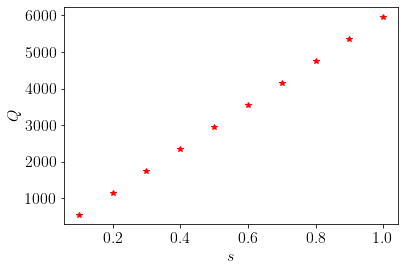

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import linprog
plt.rc('text',usetex=True)
plt.rc('font',size=16)
A = [[-1,-1,0,0],[0,0,-1,-1],[3,0,2,0],[0,3,0,2]]
b = [-30,-30,120,48]
s = 0.1
aa=[]
ss=[]
while s < 1:
    x1=-100*s
    x2=-90*s+3*(1-s)
    x3=-80*s
    x4=-70*s+2*(1-s)
    c = [x1,x2,x3,x4]
    res = linprog(c,A,b,None,None)
    x = res.x
    Q = -res.fun
    aa.append(s)
    ss.append(Q)
    s = s + 0.1
print(aa)
print(ss)
plt.plot(aa,ss,'r*')
plt.xlabel('$s$')
plt.ylabel('$Q$',rotation=90)
plt.show()

In [12]:
from scipy.optimize import linprog
c = [-1,-1]
A = [[3,2],[5,10],[-1,1]]
b = [1200,10000,0]
res = linprog(c,A,b,None,None)
print('最优值',-res.fun)
print('最优解',res.x)

最优值 479.99997327562096
最优解 [240.00003719 239.99993608]


In [11]:
import cvxpy as cp
import numpy as np
a = np.array([3,2])
b = np.array([5,10])
c = np.array([-1,1])
L = np.array([1,1])
x = cp.Variable((1,2),integer=True)
obj = cp.Maximize(x@L)
con = [x@a<=1200,x@b<=10000,x@c<=0,x>=0]
prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI',verbose=True)
print('最优值为：',prob.value)
print('最优解为：',x.value)

最优值为： 480.0
最优解为： [[240. 240.]]
